# Code Guide CPS Data

## How To access CPS Data

---

To utilize CPS Data, depending on what you seek, start off by going to this link: 
https://www.bls.gov/cps/data.htm

![Sample Image](data-start.png)

You will see a page that looks like above. Based on the type of data you want, you go to the respective Data Finder (the pink button).
From there, you should be able to use the search bar from there. To aquire the data, click on the data you would like. This will take you to a website containing a lineplot graphing the data over a set time period (which you can change above). 
from there, you can scroll down to see the raw data, then export the data as a CSV. To change the year rage of the data, you need to change it from the dropdown menu above, then click **Update**.


# Current Population Survey (CPS) Databases – Data Types by Access Method

---

## 1. Labor Force Statistics (CPS Main Database)

These statistics cover the core labor force metrics in the U.S.

- **Top Picks / Data Finder / One Screen**  
  - Employment & unemployment levels  
  - Labor force participation rates  
  - Employment-population ratios  
  - Unemployment rates by demographic group (age, sex, race, etc.)

- **Tables**  
  - Monthly and annual labor force trends  
  - Breakdowns by educational attainment, industry, occupation  
  - Geographic data (e.g., by region or state)

- **Text Files**  
  - Raw microdata at the individual level  
  - Employment status, hours worked, demographics  
  - Used for custom tabulations or statistical analysis

---

## 2. Weekly & Hourly Earnings (CPS Earnings)

Focuses on income derived from employment.

- **Top Picks / Data Finder / One Screen**  
  - Median usual weekly earnings by occupation, sex, and race  
  - Full-time vs part-time earnings  
  - Earnings by education level or age group

- **Tables**  
  - Earnings by wage deciles and percentiles  
  - Comparisons across demographic and employment categories  
  - Historical trends

- **Text Files**  
  - Person-level data  
  - Weekly earnings, hours worked  
  - Industry and occupation identifiers

---

## 3. Union Affiliation Data (CPS Union)

Explores union membership among employed individuals.

- **Top Picks / Data Finder / One Screen**  
  - Union membership rates by industry, occupation, or demographics  
  - Number of workers represented by unions (not just members)

- **Tables**  
  - Union vs non-union earnings  
  - Union density by sector (public/private)  
  - Time-series data on unionization

- **Text Files**  
  - Union status indicators  
  - Occupation and industry codes  
  - Full demographic and labor force information

---

## 4. Marital and Family Labor Force Statistics

Focuses on family structure and how it relates to employment.

- **Top Picks / Data Finder**  
  - Labor force participation of married vs unmarried individuals  
  - Employment status of parents  
  - Dual-earner households

- **Tables**  
  - Presence of spouse or children  
  - Family type (single parent, married couple, etc.)  
  - Employment of mothers and fathers by age of children

- **Text Files**  
  - Variables on household/family relationship  
  - Marital status  
  - Presence and age of children  
  - Employment status and demographics


For Cleaning the data, consider the example below for the unemployment rate:

### Unemployment Data Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("unemployment-data-1948-2025-sample.csv")
df

,Series ID,Year,Period,Label,Value
0,LNS14000000,1948,M01,1948 Jan,3.4
1,LNS14000000,1948,M02,1948 Feb,3.8
2,LNS14000000,1948,M03,1948 Mar,4.0
3,LNS14000000,1948,M04,1948 Apr,3.9
4,LNS14000000,1948,M05,1948 May,3.5
...,...,...,...,...,...
921,LNS14000000,2024,M10,2024 Oct,4.1
922,LNS14000000,2024,M11,2024 Nov,4.2
923,LNS14000000,2024,M12,2024 Dec,4.1
924,LNS14000000,2025,M01,2025 Jan,4.0


We see some exess columns that may not be usefull. Lets consider the example of trying to remove **"Series ID" and "Period"**

In [ ]:
df.drop(["Series ID", "Period"], axis=1) #set inplace=True if you want to directly modify the dataframe, otherwise, unless you assign it to a new variable, this result will not be saved

,Year,Label,Value
0,1948,1948 Jan,3.4
1,1948,1948 Feb,3.8
2,1948,1948 Mar,4.0
3,1948,1948 Apr,3.9
4,1948,1948 May,3.5
...,...,...,...
921,2024,2024 Oct,4.1
922,2024,2024 Nov,4.2
923,2024,2024 Dec,4.1
924,2025,2025 Jan,4.0


Now we will agregate the data for each year by the mean of each year. The following function will groupby the given column, and will use the **.func(params)** to determine how to agregate the data.

In [12]:
mean_unemployment_df = df.groupby("Year").mean(numeric_only=True)
mean_unemployment_df

,Value
Year,
1948,3.750000
1949,6.050000
1950,5.208333
1951,3.283333
1952,3.025000
...,...
2021,5.358333
2022,3.641667
2023,3.633333


Matplotlib plot

Text(0, 0.5, 'Uneployment rate (%)')

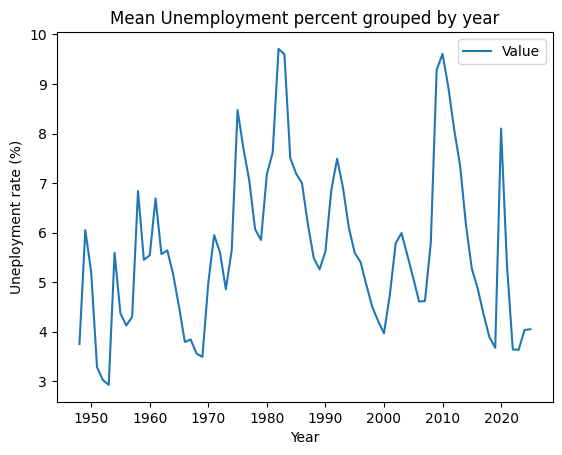

In [10]:
sns.lineplot(data=mean_unemployment_df)
plt.title("Mean Unemployment percent grouped by year")
plt.ylabel("Uneployment rate (%)")

Fancy Plotly Express plot

In [19]:

fig = px.line(mean_unemployment_df.reset_index(), x='Year', y='Value', title='Average Unemployment by Year')
fig.show()
